In [1]:
import numpy as np
import pandas as pd
rng = np.random.default_rng()
pd.options.display.float_format = '{:6.4f}'.format

In [2]:
sample_size = 1000000

In [3]:
sample_sizes = list()
inlegrals = list()
μ = 0.0
n_dimentions_list = range(2,15)
for n_dimentions in n_dimentions_list:
    sample = rng.normal(loc=μ, size=(sample_size, n_dimentions))
    norm_L1 = sample.cumsum(axis=1)
    norm_L1[:,-1] = sample[:,-1]
    filter_L1 = np.all(norm_L1 > 0.0, axis=1)
    sample_size_temp = filter_L1.sum()
    integral_temp = sample[filter_L1,-1].mean()
    sample_sizes.append(sample_size_temp)
    inlegrals.append(integral_temp)
relationship_to_dimentions = pd.DataFrame({'Sample size': sample_sizes, 'Integral': inlegrals}, index = n_dimentions_list)
relationship_to_dimentions.index.name = '# dimentions'

In [4]:
print(relationship_to_dimentions)

              Sample size  Integral
# dimentions                       
2                  249706    0.7988
3                  187000    0.7986
4                  155758    0.7956
5                  136774    0.7955
6                  123590    0.7984
7                  113022    0.7974
8                  105238    0.7995
9                   98295    0.7969
10                  92731    0.8009
11                  88024    0.7942
12                  83991    0.7956
13                  80676    0.7979
14                  77583    0.8007


<AxesSubplot:title={'center':'Relationship semi-convolution integral to number of dimentions'}, xlabel='Number of dimentions', ylabel='Positive integral'>

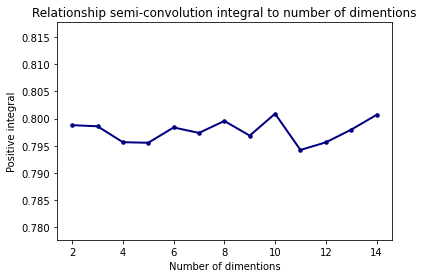

In [5]:
the_range = relationship_to_dimentions.Integral.max() - relationship_to_dimentions.Integral.min()
relationship_to_dimentions.Integral.plot(lw=2, 
                                         colormap='jet', 
                                         marker='.', 
                                         markersize=7, 
                                         title='Relationship semi-convolution integral to number of dimentions', 
                                         xlabel = 'Number of dimentions', ylabel = 'Positive integral', 
                                         ylim=(relationship_to_dimentions.Integral.mean() - 3.0 * the_range, 
                                               relationship_to_dimentions.Integral.mean() + 3.0 * the_range))

In [6]:
sample_sizes = list()
inlegrals = list()
n_dimentions = 2
μs = np.arange(-2.0,0.00001,0.02)
for μ in μs:
    sample = rng.normal(loc=μ, size=(sample_size, n_dimentions))
    norm_L1 = sample.cumsum(axis=1)
    norm_L1[:,-1] = sample[:,-1]
    filter_L1 = np.all(norm_L1 > 0.0, axis=1)
    sample_size_temp = filter_L1.sum()
    integral_temp = sample[filter_L1,-1].mean()
    sample_sizes.append(sample_size_temp)
    inlegrals.append(integral_temp)
relationship_to_μ = pd.DataFrame({'Sample size': sample_sizes, 'Integral': inlegrals}, index = μs)
relationship_to_μ.index.name = 'μ'

In [7]:
relationship_to_μ.index = relationship_to_μ.index.format(formatter='{:5.2f}'.format)
print(relationship_to_μ)

       Sample size  Integral
-2.00          545    0.3578
-1.98          561    0.3587
-1.96          611    0.3878
-1.94          668    0.3495
-1.92          730    0.3644
...            ...       ...
-0.08       219556    0.7668
-0.06       226758    0.7758
-0.04       233412    0.7846
-0.02       242786    0.7896
 0.00       249218    0.7989

[101 rows x 2 columns]


<AxesSubplot:title={'center':'Relationship semi-convolution integral to μ'}, xlabel='μ', ylabel='Positive integral'>

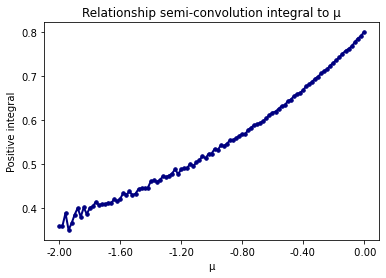

In [8]:
relationship_to_μ.Integral.plot(lw=2, 
                                colormap='jet', 
                                marker='.', 
                                markersize=7, 
                                title='Relationship semi-convolution integral to μ', 
                                xlabel = 'μ', 
                                ylabel = 'Positive integral')